In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.patches as patches





In [2]:
ny = 36
nx = 96
convmesh = np.load("./conv_geo_mesh_center.npy")
convmesh_x = np.load("./conv_geo_mesh_x.npy")
convmesh_y = np.load("./conv_geo_mesh_y.npy")

almesh = np.load("./al_geo_mesh_center.npy")
almesh_x = np.load("./al_geo_mesh_x.npy")
almesh_y = np.load("./al_geo_mesh_y.npy")
co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")
print(np.shape(co_facing))
print(np.shape(al_facing))
def conv_distance_center(first_point, second_point):
    x_range = x_convmeshinfo[first_point[1],first_point[0]]-x_convmeshinfo[second_point[1],second_point[0]]
    y_range = y_convmeshinfo[first_point[1],first_point[0]]-y_convmeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def conv_distance_point(first_point, second_point):
    x_range = convmesh_x[first_point[2],first_point[1],first_point[0]]-convmesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = convmesh_y[first_point[2],first_point[1],first_point[0]]-convmesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_almeshinfo[first_point[1],first_point[0]]-x_almeshinfo[second_point[1],second_point[0]]
    y_range = y_almeshinfo[first_point[1],first_point[0]]-y_almeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = almesh_x[first_point[2],first_point[1],first_point[0]]-almesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = almesh_y[first_point[2],first_point[1],first_point[0]]-almesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result



def total_pressure(ne,te,na,ti):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
    return pr

def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
dumx_convmeshinfo = convmesh[:,0]
dumy_convmeshinfo = convmesh[:,1]
x_convmeshinfo = dumx_convmeshinfo.reshape(ny+2,nx+2)
y_convmeshinfo = dumy_convmeshinfo.reshape(ny+2,nx+2)

dumx_almeshinfo = almesh[:,0]
dumy_almeshinfo = almesh[:,1]
x_almeshinfo = dumx_almeshinfo.reshape(ny+2,nx+2)
y_almeshinfo = dumy_almeshinfo.reshape(ny+2,nx+2)



#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)

conv_sep_out_target = np.zeros(2)
conv_sep_out_target[0] = convmesh_x[1,18,96]
conv_sep_out_target[1] = convmesh_y[1,18,96]

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = almesh_x[1,18,96]
al_sep_out_target[1] = almesh_y[1,18,96]
convmesh_x_cen = np.sum(convmesh_x, axis = 0)/4
convmesh_y_cen = np.sum(convmesh_y, axis = 0)/4
almesh_x_cen = np.sum(almesh_x, axis = 0)/4
almesh_y_cen = np.sum(almesh_y, axis = 0)/4
print(conv_sep_out_target)
conv_sep_out_target_dist = np.zeros(ny+2)
X_point = []
for i in range(ny+2):
    conv_sep_out_target_dist[i] = conv_distance_point([96,i,1],[96,18,1])
    if i<18:
        conv_sep_out_target_dist[i] = -conv_sep_out_target_dist[i]
    
conv_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_target_dist[i] = conv_distance_point([1,i,1],[1,18,1])
    if i<18:
        conv_sep_in_target_dist[i] = -conv_sep_in_target_dist[i]
print(conv_sep_out_target_dist)

print(al_sep_out_target)
al_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    if i<18:
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
    
al_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([1,i,1],[1,18,1])
    if i<18:
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]


        
        
conv_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_midplane_dist[i] = conv_distance_point([51,i,1],[51,18,1])
    if i<18:
        conv_sep_out_midplane_dist[i] = -conv_sep_out_midplane_dist[i]
    
conv_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_midplane_dist[i] = conv_distance_point([29,i,1],[29,18,1])
    if i<18:
        conv_sep_in_midplane_dist[i] = -conv_sep_in_midplane_dist[i]


al_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    if i<18:
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
    
al_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_midplane_dist[i] = al_distance_point([29,i,1],[29,18,1])
    if i<18:
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]

    
conv_Xpt_dist = np.zeros(20)
for i in range(20):
    conv_Xpt_dist[i] = conv_distance_center([78,18],[78+i,18])

    
    
al_Xpt_dist = np.zeros(20)
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)






(3, 38, 98)
(3, 38, 98)
[ 1.46925157 -1.29399156]
[-0.0715723  -0.07152744 -0.06704153 -0.06229474 -0.05731827 -0.05215115
 -0.04692141 -0.04169072 -0.03650874 -0.03143631 -0.02655407 -0.02190946
 -0.01750687 -0.01347613 -0.00982187 -0.00661739 -0.00386102 -0.00163475
  0.          0.00099463  0.00205597  0.00379204  0.00621517  0.00931366
  0.01314076  0.0176591   0.02284651  0.02871627  0.03528336  0.04247052
  0.0503574   0.05881249  0.06791765  0.07758154  0.08785052  0.09866668
  0.10996054  0.12180333]
[ 1.49532367 -1.39853962]
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


<span style="color:#87cefa; font-size:150%">죽이고 싶은 fort.44와의 44선</span> 

In [3]:
with open("./20220718_data/fort44_b2fplasmf_co_Ne_zero",'r') as f:
    line = f.readlines()
    #line_1 = line.split()
    
data_array = np.array(line)
full_length = np.size(data_array)

raw_data = np.empty((1,5))

emolrad = np

for i in range(full_length):
    switch = data_array[i]
    if "eneutrad" in switch:
        start_neu = i
    elif "emolrad" in switch:
        start_mol = i
    elif "eionrad" in switch:
        start_ion = i
        
total_neu_rad=0
total_mol_rad=0
total_ion_rad=0




print(start_ion,start_mol,start_neu)
for j in range(start_neu+1,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        damn_array = np.array(data_array[j].split())
        total_neu_rad += np.sum(damn_array.astype(np.float64))
for j in range(start_mol+1,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        damn_array = np.array(data_array[j].split())
        total_mol_rad += np.sum(damn_array.astype(np.float64))

for j in range(start_ion+1,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        damn_array = np.array(data_array[j].split())
        total_ion_rad += np.sum(damn_array.astype(np.float64))




79474 78753 76592


In [4]:
#density for sure.......
for j in range(full_length):
    if "dab2" in data_array[j]:
        print(data_array[j])
        den_start = j
        break;
        
neuden_array = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(den_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        a = (np.array(data_array[j].split())).astype(np.float64)
        neuden_array = np.concatenate([neuden_array,a])
print(np.shape(neuden_array))
#print(neuden_array)
neuden_array = neuden_array.reshape(3,36,96)

print(neuden_array[0,0,:])

*eirene data field dab2 with size  10368

(10368,)
[8.4516520e+17 7.6618243e+17 7.2932614e+17 7.0427645e+17 6.4551408e+17
 6.9643871e+17 6.6279303e+17 5.5565088e+17 5.6788692e+17 4.1976759e+17
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.7835022e+13
 4.5606250e+14 1.3492385e+14 2.7715291e+14 1.2049089e+14 5.2230571e+14
 3.7188285e+14 2.5650187e+14 8.5787753e+14 8.8959379e+13 3.3678865e+14
 9.8151363e+14 2.2716276e+14 7.2265636e+14 3.3485564e+14 5.1332319e+14
 3.4304566e+14 0.0000000e+00 7.6875082e+13 1.4982842e+14 2.3327757e+14
 0.0000000e+00 1.0261910e+14 1.1868951e+14 7.2700744e+13 2.7904022e+14
 5.1975186e+14 7.8757336e+13 1.8775535e+14 4.4405902e+14 1.1741717e+15
 1.0448720e+15 7.9665648e+14 1.3696402e+15 1.1790956e+15 1.6850613e+15
 1.8358645e+15 1.7427202e+15 1.1798204e+15 9.9184295e+14 1.3721657e+15
 1.6977340e+15 1.8631857e+15 2.7743233e+15 1.8448730e+15 2.2156954e+15
 2.3170651e+15 2.4941999e+15 2.6099606e+15 1.6999828e+15 1.5550323e+15
 6.8632662e+14 1.0459550e+

In [5]:
np.shape(co_facing)

(3, 38, 98)

In [6]:
#go for flux .......
for j in range(full_length):
    if "pefluxa" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
a_pol_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        a = (np.array(data_array[j].split())).astype(np.float64)
        a_pol_heatflux = np.concatenate([a_pol_heatflux,a])
print(np.shape(a_pol_heatflux))
#print(neuden_array)
a_pol_heatflux = a_pol_heatflux.reshape(3,36,96)

a_pol_heatflux[0,:,:] = a_pol_heatflux[0,:,:]*co_facing[0,2:,2:]
a_pol_heatflux[1,:,:] = a_pol_heatflux[1,:,:]*co_facing[0,2:,2:]
a_pol_heatflux[2,:,:] = a_pol_heatflux[2,:,:]*co_facing[0,2:,2:]


for j in range(full_length):
    if "pefluxm" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
m_pol_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        m = (np.array(data_array[j].split())).astype(np.float64)
        m_pol_heatflux = np.concatenate([m_pol_heatflux,m])
print(np.shape(m_pol_heatflux))
#print(neuden_array)
m_pol_heatflux = m_pol_heatflux.reshape(36,96)

m_pol_heatflux[:,:] = m_pol_heatflux[:,:]*co_facing[0,2:,2:]


*eirene data field pefluxa with size  10368

(10368,)
*eirene data field pefluxm with size   3456

(3456,)


In [7]:
#go for flux .......
for j in range(full_length):
    if "refluxa" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
a_rad_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        a1 = (np.array(data_array[j].split())).astype(np.float64)
        a_rad_heatflux = np.concatenate([a_rad_heatflux,a1])
print(np.shape(a_rad_heatflux))
#print(neuden_array)
a_rad_heatflux = a_rad_heatflux.reshape(3,36,96)

a_rad_heatflux[0,:,:] = a_rad_heatflux[0,:,:]*co_facing[1,2:,2:]
a_rad_heatflux[1,:,:] = a_rad_heatflux[1,:,:]*co_facing[1,2:,2:]
a_rad_heatflux[2,:,:] = a_rad_heatflux[2,:,:]*co_facing[1,2:,2:]


for j in range(full_length):
    if "refluxm" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
m_rad_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        m1 = (np.array(data_array[j].split())).astype(np.float64)
        m_rad_heatflux = np.concatenate([m_rad_heatflux,m1])
print(np.shape(m_pol_heatflux))
#print(neuden_array)
m_rad_heatflux = m_rad_heatflux.reshape(36,96)

m_rad_heatflux[:,:] = m_rad_heatflux[:,:]*co_facing[1,2:,2:]




*eirene data field refluxa with size  10368

(10368,)
*eirene data field refluxm with size   3456

(36, 96)


/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_23842/1087027074.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen[2:,2:], convmesh_y_cen[2:,2:], abs(a_pol_heatflux[0,:,:]))


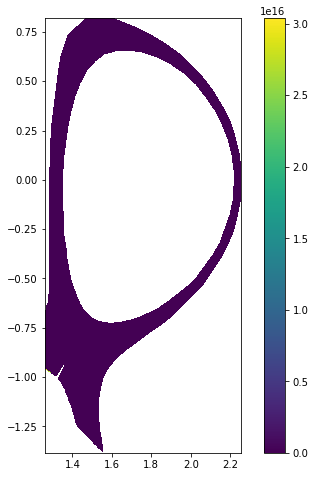

In [8]:


plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

#plt.title("Electric potential")
#plt.xlim(1.4,1.6)
#plt.ylim(-1.4,-1.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(convmesh_x_cen[2:,2:], convmesh_y_cen[2:,2:], abs(a_pol_heatflux[0,:,:]))
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()



In [9]:
abs(a_pol_heatflux[0,:,:])

array([[3.04023824e+16, 2.80241420e+16, 2.72690288e+16, ...,
        3.00501144e+02, 1.58635185e+02, 2.10986605e+02],
       [9.50934930e+01, 9.33600392e+01, 8.98685206e+01, ...,
        1.12436080e+02, 3.32087337e+02, 1.73826270e+02],
       [1.23325715e+02, 1.23445547e+02, 1.06358886e+02, ...,
        4.80284147e+01, 9.85412074e+01, 6.57425554e+02],
       ...,
       [1.23058834e+03, 1.14820085e+03, 9.90646064e+01, ...,
        1.05908593e+03, 6.74466595e+02, 4.66882153e+02],
       [2.77682101e+03, 1.84772052e+03, 2.63428446e+03, ...,
        7.41696680e+02, 5.31111188e+02, 2.60750584e+02],
       [1.94334519e+01, 2.53737690e+01, 2.28148919e+01, ...,
        5.87826825e+00, 3.59656154e+00, 2.01621843e+00]])

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_23842/2089227693.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(abs(m_pol_heatflux[2:,2:])))


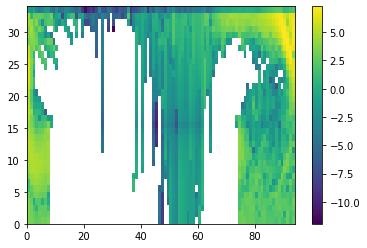

In [10]:
plt.pcolormesh(np.log(abs(m_pol_heatflux[2:,2:])))
plt.colorbar()

In [11]:
m_pol_heatflux

array([[ 3.04023824e+16,  2.80241420e+16,  2.72690288e+16, ...,
        -4.81627588e+00, -6.18700264e+00, -9.28209783e+00],
       [-2.80381636e+01, -4.21568792e+01, -3.78088943e+01, ...,
        -6.91862882e+00, -4.70145763e+00, -8.55565737e+00],
       [-2.35212593e+01, -4.46355915e+01, -3.28792649e+01, ...,
        -1.68998373e+01, -4.31929319e+00, -1.56397031e+01],
       ...,
       [ 3.49273411e+01,  1.11933127e+01,  8.81540447e+01, ...,
         6.63096251e+01, -5.42601981e+02, -9.43263351e+02],
       [-1.95298757e+01,  1.74257724e+00,  9.83856804e+01, ...,
        -1.64532581e+02, -6.79154872e+02, -8.49448100e+02],
       [-8.24510919e-01, -2.15002688e+00, -3.20473815e-01, ...,
        -2.72684238e+00, -4.90621121e+00, -6.29420047e+00]])

In [12]:
print(neuden_array)

[[[8.4516520e+17 7.6618243e+17 7.2932614e+17 ... 2.8709133e+17
   3.8440896e+17 3.2431229e+17]
  [7.0617584e+17 9.6839151e+17 8.8904187e+17 ... 4.0884062e+17
   3.9756015e+17 3.8574752e+17]
  [1.2857718e+18 1.1262709e+18 1.0311532e+18 ... 4.6906573e+17
   3.8434131e+17 4.7732005e+17]
  ...
  [1.1009629e+18 8.2399163e+17 5.2689492e+17 ... 8.2800596e+18
   6.4213032e+18 4.7736583e+18]
  [5.7966652e+17 5.1048274e+17 3.5654894e+17 ... 5.1507218e+18
   3.6548285e+18 3.2293028e+18]
  [2.6817878e+17 2.4425072e+17 1.7650382e+17 ... 2.6242924e+18
   2.2282865e+18 1.6341326e+18]]

 [[1.4311113e+17 1.1495601e+17 1.7075873e+17 ... 8.2238823e+16
   7.0087782e+16 1.4270802e+17]
  [2.0562803e+17 1.7559593e+17 2.3847436e+17 ... 7.4529402e+16
   1.1771781e+17 1.4908407e+17]
  [1.7679914e+17 1.8764228e+17 2.4956280e+17 ... 1.0545269e+17
   1.1033874e+17 1.4202609e+17]
  ...
  [1.1393810e+17 9.7093056e+15 3.1835245e+14 ... 1.1987632e+18
   1.1247525e+18 8.7989199e+17]
  [8.8523933e+16 1.9623656e+16 2.452

In [13]:
        
print(total_neu_rad)
print(total_mol_rad)
print(total_ion_rad)

-200526.55071488908
-80527.08230894255
-12969.023523755992


In [14]:
fht_b2fplasmf_co_KSTAR_noNe  =np.load("./fht_b2fplasmf_co_KSTAR_noNe.npy")

fhi_b2fplasmf_co_KSTAR_noNe  =np.load("./fhi_b2fplasmf_co_KSTAR_noNe.npy")
fhe_b2fplasmf_co_KSTAR_noNe  =np.load("./fhe_b2fplasmf_co_KSTAR_noNe.npy")




rsahi_b2fplasmf_co_KSTAR_noNe=np.load("./rsahi_b2fplasmf_co_KSTAR_noNe.npy")
rsana_b2fplasmf_co_KSTAR_noNe=np.load("./rsana_b2fplasmf_co_KSTAR_noNe.npy")
rcxhi_b2fplasmf_co_KSTAR_noNe=np.load("./rcxhi_b2fplasmf_co_KSTAR_noNe.npy")
rrahi_b2fplasmf_co_KSTAR_noNe=np.load("./rrahi_b2fplasmf_co_KSTAR_noNe.npy")
rqrad_b2fplasmf_co_KSTAR_noNe=np.load("./rqrad_b2fplasmf_co_KSTAR_noNe.npy")
total_heat = 2.5*1000000

FileNotFoundError: [Errno 2] No such file or directory: './fht_b2fplasmf_co_KSTAR_noNe.npy'

In [ ]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Boundary?")
#plt.xlim(1.2,1.8)
#plt.ylim(-1.4,-0.8)
#for i in range(36):
#    ra_index = i
#    plt.plot(convmesh_x_cen[ra_index,:],convmesh_y_cen[ra_index,:], color='Black')
#plt.scatter(convmesh_x_cen[ra_index,:],convmesh_y_cen[ra_index,:], color='red', )
plt.plot(convmesh_x_cen[36,:],convmesh_y_cen[36,:],label="SOL Boundary")
plt.plot(convmesh_x_cen[0,11:77],convmesh_y_cen[0,11:77],label ="Core boundary")


plt.plot(convmesh_x_cen[1:,1],convmesh_y_cen[1:,1],label="inner target")
plt.plot(convmesh_x_cen[1:,96],convmesh_y_cen[1:,96],label="outer target")


plt.plot(convmesh_x_cen[1,:11],convmesh_y_cen[1,:11],label="PFR Boundary1")
plt.plot(convmesh_x_cen[1,77:],convmesh_y_cen[1,77:],label="PFR Boundary2")






plt.legend()

#plt.colorbar()

plt.show()

In [ ]:
print(np.sum(fht_b2fplasmf_co_KSTAR_noNe[0,0,11:77]))
print(np.sum(fht_b2fplasmf_co_KSTAR_noNe[1,0,11:77]))

In [ ]:
heat_core = (np.sum(fht_b2fplasmf_co_KSTAR_noNe[0,0,11:77])+np.sum(fht_b2fplasmf_co_KSTAR_noNe[1,0,11:77]))/total_heat
print(heat_core)


In [ ]:
np.shape(a_rad_heatflux)

In [ ]:
a_rad_heatflux_sum = np.sum(a_rad_heatflux,axis=0)
a_pol_heatflux_sum = np.sum(a_pol_heatflux,axis=0)



print(np.sum(a_rad_heatflux_sum[:,95]))
print(np.sum(a_pol_heatflux_sum[:,95]))

print(np.sum(a_rad_heatflux_sum[:,0]))
print(np.sum(a_pol_heatflux_sum[:,0]))

print(np.sum(m_rad_heatflux[:,95]))
print(np.sum(m_pol_heatflux[:,95]))

print(np.sum(m_rad_heatflux[:,0]))
print(np.sum(m_pol_heatflux[:,0]))



In [ ]:
print(m_pol_heatflux[:,35])

In [ ]:

plt.plot(convmesh_x_cen[36,:],convmesh_y_cen[36,:])



In [ ]:
print(heat_core*total_heat)

In [ ]:
abs_heat_outer_diver = np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[1,1:,96]))/total_heat+ np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96]))/total_heat

abs_heat_inner_diver = np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[1,1:,1]))/total_heat+np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,1]))/total_heat

abs_heat_PRF = (np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[1,1,77:]))+np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[0,1,77:]))+np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[1,1,:11]))+np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[0,1,:11])))/total_heat

abs_total_rad = np.sum(abs(rqrad_b2fplasmf_co_KSTAR_noNe))/total_heat

abs_vessel_heat = (np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[0,37,:]))+np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[1,37,:])))/total_heat

abs_heat_sink = (np.sum(abs(rrahi_b2fplasmf_co_KSTAR_noNe))+np.sum(abs(rcxhi_b2fplasmf_co_KSTAR_noNe))+np.sum(abs(rsahi_b2fplasmf_co_KSTAR_noNe)))/total_heat

abs_inner_heat = (np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[0,0,11:77]))+np.sum(abs(fht_b2fplasmf_co_KSTAR_noNe[1,0,11:77])))/total_heat

In [ ]:
rad_correction = np.sum(np.sum(rqrad_b2fplasmf_co_KSTAR_noNe,axis = 2),axis=1)
rad_corr = rad_correction[0]+rad_correction[2]+rad_correction[9]

In [ ]:
heat_outer_diver = np.sum((fht_b2fplasmf_co_KSTAR_noNe[1,1:,96]))/total_heat+ np.sum((fht_b2fplasmf_co_KSTAR_noNe[0,1:,96]))/total_heat

heat_inner_diver = -np.sum((fht_b2fplasmf_co_KSTAR_noNe[1,1:,1]))/total_heat-np.sum((fht_b2fplasmf_co_KSTAR_noNe[0,1:,1]))/total_heat

heat_PRF = -(np.sum((fht_b2fplasmf_co_KSTAR_noNe[1,1,77:]))+np.sum((fht_b2fplasmf_co_KSTAR_noNe[1,1,:11])))/total_heat

total_rad = (np.sum(rqrad_b2fplasmf_co_KSTAR_noNe)-rad_corr-total_ion_rad-total_mol_rad-total_neu_rad)/total_heat

vessel_heat = (np.sum(fht_b2fplasmf_co_KSTAR_noNe[0,37,:])+np.sum(fht_b2fplasmf_co_KSTAR_noNe[1,37,:]))/total_heat

heat_sink = (np.sum(rrahi_b2fplasmf_co_KSTAR_noNe)+np.sum(rcxhi_b2fplasmf_co_KSTAR_noNe)+np.sum(rsahi_b2fplasmf_co_KSTAR_noNe))/total_heat

inner_heat = -(np.sum((fht_b2fplasmf_co_KSTAR_noNe[0,0,11:77]))-np.sum((fht_b2fplasmf_co_KSTAR_noNe[1,0,11:77])))/total_heat


print(heat_inner_diver+heat_outer_diver+vessel_heat+heat_sink+total_rad+heat_PRF+inner_heat)



In [ ]:
eheat_outer_diver = np.sum((fhe_b2fplasmf_co_KSTAR_noNe[1,1:,96]))/total_heat+ np.sum((fhe_b2fplasmf_co_KSTAR_noNe[0,1:,96]))/total_heat

eheat_inner_diver = -np.sum((fhe_b2fplasmf_co_KSTAR_noNe[1,1:,1]))/total_heat-np.sum((fhe_b2fplasmf_co_KSTAR_noNe[0,1:,1]))/total_heat

eheat_PRF = -(np.sum((fhe_b2fplasmf_co_KSTAR_noNe[1,1,77:]))+np.sum((fhe_b2fplasmf_co_KSTAR_noNe[1,1,:11])))/total_heat

evessel_heat = (np.sum(fhe_b2fplasmf_co_KSTAR_noNe[0,37,:])+np.sum(fhe_b2fplasmf_co_KSTAR_noNe[1,37,:]))/total_heat

einner_heat = -(np.sum((fhe_b2fplasmf_co_KSTAR_noNe[0,0,11:77]))-np.sum((fhe_b2fplasmf_co_KSTAR_noNe[1,0,11:77])))/total_heat



iheat_outer_diver = np.sum((fhi_b2fplasmf_co_KSTAR_noNe[1,1:,96]))/total_heat+ np.sum((fhi_b2fplasmf_co_KSTAR_noNe[0,1:,96]))/total_heat

iheat_inner_diver = -np.sum((fhi_b2fplasmf_co_KSTAR_noNe[1,1:,1]))/total_heat-np.sum((fhi_b2fplasmf_co_KSTAR_noNe[0,1:,1]))/total_heat

iheat_PRF = -(np.sum((fhi_b2fplasmf_co_KSTAR_noNe[1,1,77:]))+np.sum((fhi_b2fplasmf_co_KSTAR_noNe[1,1,:11])))/total_heat

ivessel_heat = (np.sum(fhi_b2fplasmf_co_KSTAR_noNe[0,37,:])+np.sum(fhi_b2fplasmf_co_KSTAR_noNe[1,37,:]))/total_heat

iinner_heat = -(np.sum((fhi_b2fplasmf_co_KSTAR_noNe[0,0,11:77]))-np.sum((fhi_b2fplasmf_co_KSTAR_noNe[1,0,11:77])))/total_heat


print(total_rad+eheat_inner_diver+eheat_outer_diver+evessel_heat+eheat_PRF+einner_heat+iheat_inner_diver+iheat_outer_diver+ivessel_heat+iheat_PRF+iinner_heat)




In [ ]:
np.sum(np.sum(rqrad_b2fplasmf_co_KSTAR_noNe,axis = 2),axis=1)

In [ ]:
print(heat_inner_diver+heat_outer_diver+vessel_heat+heat_sink+total_rad+heat_PRF+inner_heat)



In [ ]:
print(heat_inner_diver,heat_outer_diver, vessel_heat, heat_sink,total_rad)

In [ ]:
dum1_vessel_heat = np.sum(fht_b2fplasmf_co_KSTAR_noNe[0,36,:])+np.sum(fht_b2fplasmf_co_KSTAR_noNe[1,36,:])
dum2_vessel_heat = np.sum(fht_b2fplasmf_co_KSTAR_noNe[0,37,:])+np.sum(fht_b2fplasmf_co_KSTAR_noNe[1,37,:])

print(dum1_vessel_heat/total_heat)
print(dum2_vessel_heat/total_heat)


In [ ]:
print(np.shape(convmesh_x_cen[1,77:]))
print(np.shape(convmesh_x_cen[1,-21:]))

In [ ]:
print((convmesh_x_cen[1,77:]))
print((convmesh_x_cen[1,-21:]))